In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
bankruptcy_data_v1=pd.read_csv('Predict_bankruptcy.csv')
bankruptcy_data_v1.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,...,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,2,-0.006202,0.48465,0.23298,1.5998,6.1825,0,-0.006202,1.0634,1.2757,...,-0.028591,-0.012035,1.00470,0.15222,6.0911,3.2749,111.140,3.2841,3.37,0
2,3,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,...,0.123960,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0
3,4,-0.089951,0.887,0.26927,1.5222,-55.992,-0.073957,-0.089951,0.1274,1.2754,...,0.418840,-0.79602,0.59074,2.8787,7.6524,3.3302,147.560,2.4735,5.9299,0
4,5,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,...,0.240400,0.10716,0.77048,0.13938,10.118,4.095,106.430,3.4294,3.3622,0


In [3]:
bankruptcy_data_v1.dtypes

id          int64
Attr1      object
Attr2      object
Attr3      object
Attr4      object
           ...   
Attr61     object
Attr62    float64
Attr63     object
Attr64     object
class       int64
Length: 66, dtype: object

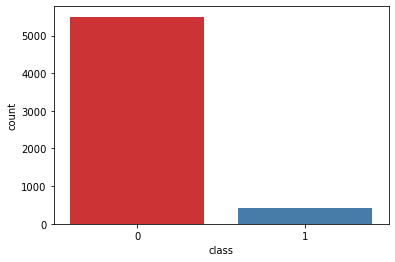

In [4]:
import seaborn as sns
sns.countplot(bankruptcy_data_v1['class'],palette="Set1")

In [5]:
#corelation analysis

cor_bankruptcy_v1= bankruptcy_data_v1.corr()

cor_bankruptcy_v1


,id,Attr13,Attr19,Attr20,Attr23,Attr30,Attr31,Attr39,Attr42,Attr43,Attr44,Attr49,Attr55,Attr56,Attr58,Attr62,class
id,1.000000,-0.010246,-0.017422,0.029478,-0.017121,0.020779,-0.014391,-0.058157,-0.002973,0.015072,0.009501,-0.002081,-0.014096,-0.051168,0.042852,0.023316,0.440095
Attr13,-0.010246,1.000000,0.177853,-0.007478,0.175917,-0.026621,0.182082,0.037167,0.329258,-0.086112,-0.091868,0.119814,-0.000647,0.041434,0.012340,-0.073858,-0.007330
Attr19,-0.017422,0.177853,1.000000,-0.023944,0.999684,-0.520333,0.986813,0.208636,0.677006,-0.486371,-0.523201,0.686318,0.006587,0.153886,-0.424713,-0.418476,-0.023425
Attr20,0.029478,-0.007478,-0.023944,1.000000,-0.022934,0.026519,-0.022097,-0.113633,-0.048056,0.465866,0.272932,-0.059982,0.002033,-0.111918,0.108954,0.039069,0.058148
Attr23,-0.017121,0.175917,0.999684,-0.022934,1.000000,-0.518777,0.986240,0.209211,0.672720,-0.483159,-0.519946,0.682473,0.006349,0.154261,-0.421366,-0.418011,-0.023340
Attr30,0.020779,-0.026621,-0.520333,0.026519,-0.518777,1.000000,-0.394863,-0.358278,-0.644951,0.665086,0.716904,-0.670583,-0.009891,-0.190913,0.405466,0.952382,0.059472
Attr31,-0.014391,0.182082,0.986813,-0.022097,0.986240,-0.394863,1.000000,0.177880,0.660896,-0.441907,-0.475291,0.668147,0.005771,0.155614,-0.418853,-0.275953,-0.014602
Attr39,-0.058157,0.037167,0.208636,-0.113633,0.209211,-0.358278,0.177880,1.000000,0.363978,-0.257778,-0.253721,0.384044,0.015616,0.937166,-0.831626,-0.351467,-0.100359
Attr42,-0.002973,0.329258,0.677006,-0.048056,0.672720,-0.644951,0.660896,0.363978,1.000000,-0.681998,-0.730260,0.973885,0.006925,0.306979,-0.585483,-0.470239,-0.023032
Attr43,0.015072,-0.086112,-0.486371,0.465866,-0.483159,0.665086,-0.441907,-0.257778,-0.681998,1.000000,0.978410,-0.702420,-0.003663,-0.187835,0.406759,0.557557,0.065923


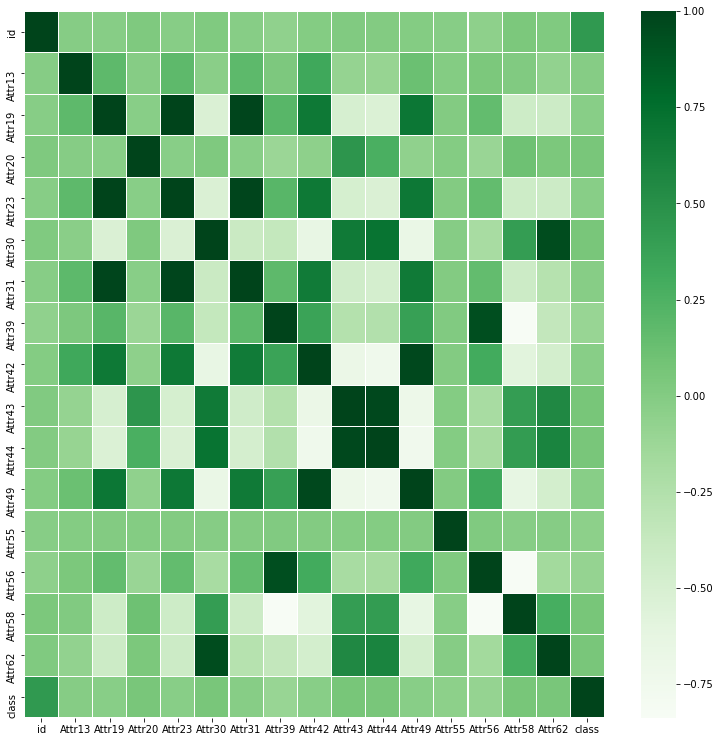

In [19]:
#plot correlation using seaborn

import seaborn as sns

f,ax = plt.subplots(figsize=(13,13))
sns.heatmap(cor_bankruptcy_v1,ax=ax, linewidths=0.1, cmap='Greens')

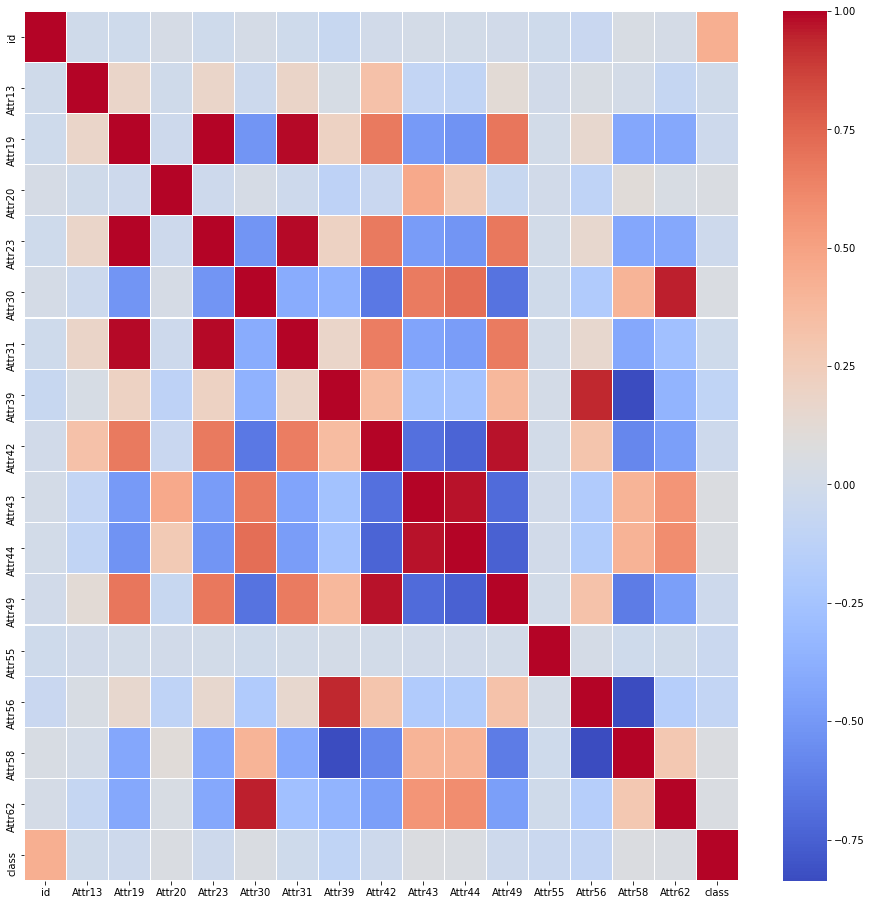

In [20]:
#plot correlation using seaborn

import seaborn as sns

f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(cor_bankruptcy_v1,ax=ax, linewidths=0.1, cmap='coolwarm')

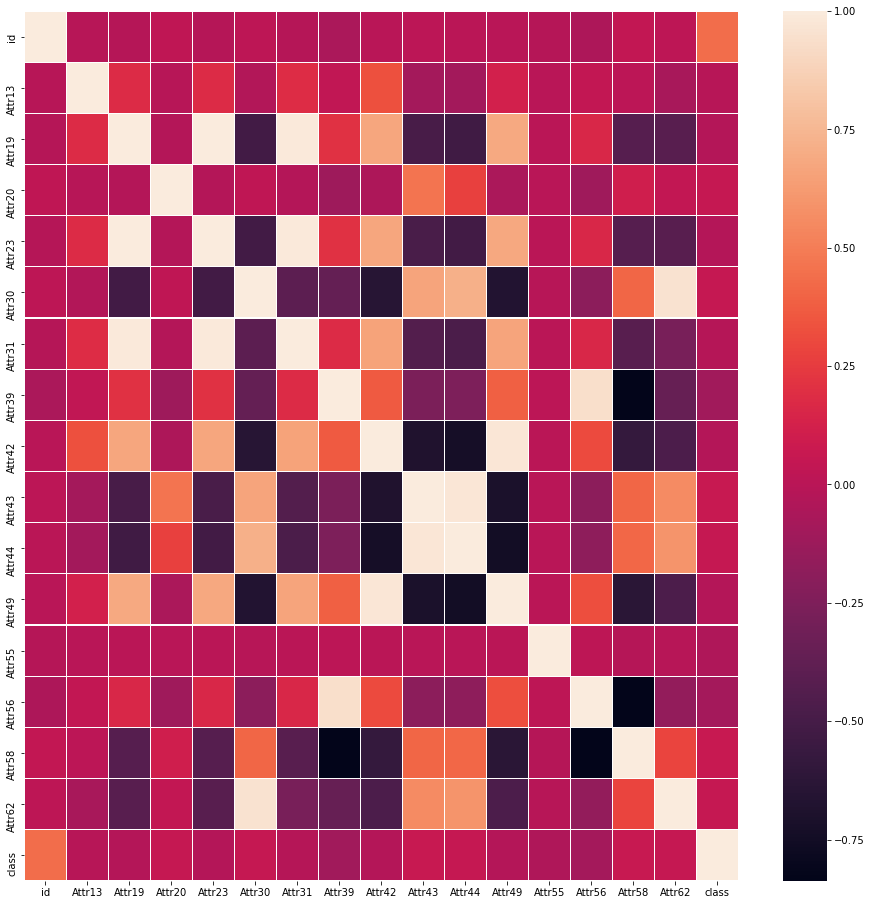

In [21]:
#plot correlation using seaborn

import seaborn as sns

f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(cor_bankruptcy_v1,ax=ax, linewidths=0.1)

In [22]:



prn=bankruptcy_data_v1[bankruptcy_data_v1['Attr1']=='?']

print(prn)

        id Attr1 Attr2 Attr3 Attr4     Attr5 Attr6 Attr7 Attr8    Attr9  ...  \
1783  1784     ?     ?     ?     ?    3825.1     ?     ?     ?  0.83894  ...   
4884  4885     ?     ?     ?     ?         0     ?     ?     ?        ?  ...   
5880  5881     ?     ?     ?     0  -1076400     ?     ?     0   7.2533  ...   

        Attr56 Attr57   Attr58  Attr59   Attr60   Attr61   Attr62    Attr63  \
1783 -0.191980      0  1.19200       0  0.46523  0.15025      0.0         ?   
4884  0.004731      ?  1.02200       ?        ?        ?      0.0         ?   
5880  0.439610      ?  0.13787       ?   4.8356        ?  25077.0  0.014555   

      Attr64  class  
1783  3.7643      0  
4884       ?      0  
5880       ?      1  

[3 rows x 66 columns]


In [23]:

#for index, row in bankruptcy_data_v1.iterrows():
for x in range(65):
     #print(bankruptcy_data_v1.iloc[:,x])
    print((bankruptcy_data_v1.iloc[:,x] == '?').sum())

0
3
3
3
21
11
3
3
18
1
3
3
21
0
3
6
18
18
3
0
0
103
3
0
135
3
18
391
107
3
0
0
46
21
18
3
3
2548
3
0
21
84
0
0
0
268
21
35
3
0


C:\Users\anjul\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


18
3
36
107
107
0
0
3
0
3
268
15
0
21
107


In [24]:
cnt_null=list(bankruptcy_data_v1.columns.values)
cnt_null_df= pd.DataFrame(cnt_null)
cnt_null_df['cnt_null']=0

for x in range(65):
     #print(bankruptcy_data_v1.iloc[:,x])
    cnt_null_df.iloc[x,1]=(bankruptcy_data_v1.iloc[:,x] == '?').sum()

In [25]:
i = cnt_null_df[cnt_null_df['cnt_null']==2548].index
cnt_null_df= cnt_null_df.drop(i)
print(i)
i = cnt_null_df[cnt_null_df['cnt_null']==268].index
cnt_null_df= cnt_null_df.drop(i)
print(i)
i = cnt_null_df[cnt_null_df['cnt_null']==391].index
cnt_null_df= cnt_null_df.drop(i)
print(i)
i = cnt_null_df[cnt_null_df['cnt_null']>100].index
cnt_null_df= cnt_null_df.drop(i)
print(i)


Int64Index([37], dtype='int64')
Int64Index([45, 60], dtype='int64')
Int64Index([27], dtype='int64')
Int64Index([21, 24, 28, 53, 54, 64], dtype='int64')


In [26]:
cnt_null_df

,0,cnt_null
0,id,0
1,Attr1,3
2,Attr2,3
3,Attr3,3
4,Attr4,21
5,Attr5,11
6,Attr6,3
7,Attr7,3
8,Attr8,18
9,Attr9,1


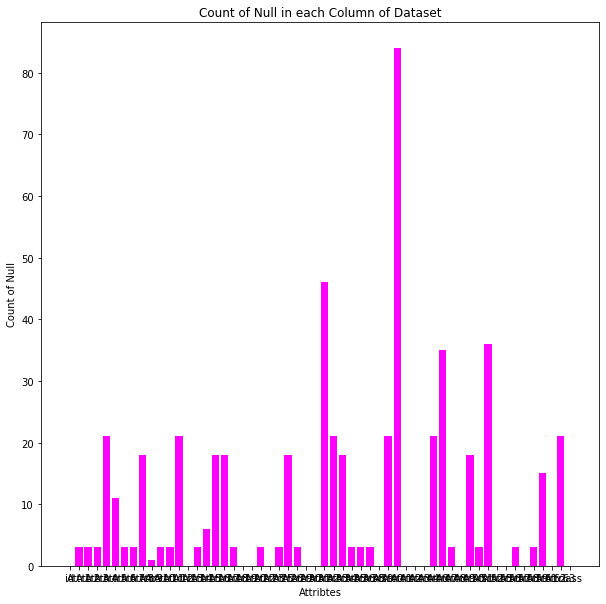

In [27]:
plt.figure(figsize=(10,10))
plt.bar(cnt_null_df.iloc[:,0],cnt_null_df.iloc[:,1],color='magenta')
plt.xlabel('Attribtes')
plt.ylabel('Count of Null')
plt.title('Count of Null in each Column of Dataset')
plt.show()



In [28]:
bankruptcy_data_v1

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.088238,0.55472,0.01134,1.0205,-66.52,0.34204,0.10949,0.57752,1.0881,...,0.080955,0.27543,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,2,-0.006202,0.48465,0.23298,1.5998,6.1825,0,-0.006202,1.0634,1.2757,...,-0.028591,-0.012035,1.00470,0.15222,6.0911,3.2749,111.140,3.2841,3.37,0
2,3,0.13024,0.22142,0.57751,3.6082,120.04,0.18764,0.16212,3.059,1.1415,...,0.123960,0.19229,0.87604,0,8.7934,2.987,71.531,5.1027,5.6188,0
3,4,-0.089951,0.887,0.26927,1.5222,-55.992,-0.073957,-0.089951,0.1274,1.2754,...,0.418840,-0.79602,0.59074,2.8787,7.6524,3.3302,147.560,2.4735,5.9299,0
4,5,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,...,0.240400,0.10716,0.77048,0.13938,10.118,4.095,106.430,3.4294,3.3622,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,5906,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,...,0.020169,0.043904,1.01220,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
5906,5907,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,...,-0.064073,1.482,1.06410,-0.018084,110.72,44.759,81.220,4.494,5.1305,1
5907,5908,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,...,0.148880,0.54824,0.85112,-0.52243,9.8526,3.4892,207.870,1.7559,9.9527,1
5908,5909,-0.10886,0.74394,0.015449,1.0878,-17.003,-0.10886,-0.10918,0.12531,0.84516,...,-0.183200,-1.1677,1.18320,6.0924,13.886,6.0769,83.122,4.3911,0.95575,1


<h1> Data Pre-processing Random Forest

<h3> profiling for our data 

In [29]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas_profiling as pp

profile= bankruptcy_data_v1.profile_report(title='Pandas Profiling report')
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/79 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data Cleaning

In [31]:
#replacing character '?' by NA values

bankruptcy_data_v1.replace({'?': None},inplace=True)


In [32]:
bankruptcy_data_v1['Attr1']=pd.to_numeric(bankruptcy_data_v1['Attr1'])
bankruptcy_data_v1['Attr2']=pd.to_numeric(bankruptcy_data_v1['Attr2'])
bankruptcy_data_v1['Attr3']=pd.to_numeric(bankruptcy_data_v1['Attr3'])
bankruptcy_data_v1['Attr4']=pd.to_numeric(bankruptcy_data_v1['Attr4'])
bankruptcy_data_v1['Attr5']=pd.to_numeric(bankruptcy_data_v1['Attr5'])
bankruptcy_data_v1['Attr6']=pd.to_numeric(bankruptcy_data_v1['Attr6'])
bankruptcy_data_v1['Attr7']=pd.to_numeric(bankruptcy_data_v1['Attr7'])
bankruptcy_data_v1['Attr8']=pd.to_numeric(bankruptcy_data_v1['Attr8'])
bankruptcy_data_v1['Attr9']=pd.to_numeric(bankruptcy_data_v1['Attr9'])
bankruptcy_data_v1['Attr10']=pd.to_numeric(bankruptcy_data_v1['Attr10'])
bankruptcy_data_v1['Attr11']=pd.to_numeric(bankruptcy_data_v1['Attr11'])
bankruptcy_data_v1['Attr12']=pd.to_numeric(bankruptcy_data_v1['Attr12'])
bankruptcy_data_v1['Attr13']=pd.to_numeric(bankruptcy_data_v1['Attr13'])
bankruptcy_data_v1['Attr14']=pd.to_numeric(bankruptcy_data_v1['Attr14'])
bankruptcy_data_v1['Attr15']=pd.to_numeric(bankruptcy_data_v1['Attr15'])
bankruptcy_data_v1['Attr16']=pd.to_numeric(bankruptcy_data_v1['Attr16'])
bankruptcy_data_v1['Attr17']=pd.to_numeric(bankruptcy_data_v1['Attr17'])
bankruptcy_data_v1['Attr18']=pd.to_numeric(bankruptcy_data_v1['Attr18'])
bankruptcy_data_v1['Attr19']=pd.to_numeric(bankruptcy_data_v1['Attr19'])
bankruptcy_data_v1['Attr20']=pd.to_numeric(bankruptcy_data_v1['Attr20'])
bankruptcy_data_v1['Attr21']=pd.to_numeric(bankruptcy_data_v1['Attr21'])
bankruptcy_data_v1['Attr22']=pd.to_numeric(bankruptcy_data_v1['Attr22'])
bankruptcy_data_v1['Attr23']=pd.to_numeric(bankruptcy_data_v1['Attr23'])
bankruptcy_data_v1['Attr24']=pd.to_numeric(bankruptcy_data_v1['Attr24'])
bankruptcy_data_v1['Attr25']=pd.to_numeric(bankruptcy_data_v1['Attr25'])
bankruptcy_data_v1['Attr26']=pd.to_numeric(bankruptcy_data_v1['Attr26'])
bankruptcy_data_v1['Attr27']=pd.to_numeric(bankruptcy_data_v1['Attr27'])
bankruptcy_data_v1['Attr28']=pd.to_numeric(bankruptcy_data_v1['Attr28'])
bankruptcy_data_v1['Attr29']=pd.to_numeric(bankruptcy_data_v1['Attr29'])
bankruptcy_data_v1['Attr30']=pd.to_numeric(bankruptcy_data_v1['Attr30'])
bankruptcy_data_v1['Attr31']=pd.to_numeric(bankruptcy_data_v1['Attr31'])
bankruptcy_data_v1['Attr32']=pd.to_numeric(bankruptcy_data_v1['Attr32'])
bankruptcy_data_v1['Attr33']=pd.to_numeric(bankruptcy_data_v1['Attr33'])
bankruptcy_data_v1['Attr34']=pd.to_numeric(bankruptcy_data_v1['Attr34'])
bankruptcy_data_v1['Attr35']=pd.to_numeric(bankruptcy_data_v1['Attr35'])
bankruptcy_data_v1['Attr36']=pd.to_numeric(bankruptcy_data_v1['Attr36'])
bankruptcy_data_v1['Attr37']=pd.to_numeric(bankruptcy_data_v1['Attr37'])
bankruptcy_data_v1['Attr38']=pd.to_numeric(bankruptcy_data_v1['Attr38'])
bankruptcy_data_v1['Attr39']=pd.to_numeric(bankruptcy_data_v1['Attr39'])
bankruptcy_data_v1['Attr40']=pd.to_numeric(bankruptcy_data_v1['Attr40'])
bankruptcy_data_v1['Attr41']=pd.to_numeric(bankruptcy_data_v1['Attr41'])
bankruptcy_data_v1['Attr42']=pd.to_numeric(bankruptcy_data_v1['Attr42'])
bankruptcy_data_v1['Attr43']=pd.to_numeric(bankruptcy_data_v1['Attr43'])
bankruptcy_data_v1['Attr44']=pd.to_numeric(bankruptcy_data_v1['Attr44'])
bankruptcy_data_v1['Attr45']=pd.to_numeric(bankruptcy_data_v1['Attr45'])
bankruptcy_data_v1['Attr46']=pd.to_numeric(bankruptcy_data_v1['Attr46'])
bankruptcy_data_v1['Attr47']=pd.to_numeric(bankruptcy_data_v1['Attr47'])
bankruptcy_data_v1['Attr48']=pd.to_numeric(bankruptcy_data_v1['Attr48'])
bankruptcy_data_v1['Attr49']=pd.to_numeric(bankruptcy_data_v1['Attr49'])
bankruptcy_data_v1['Attr50']=pd.to_numeric(bankruptcy_data_v1['Attr50'])
bankruptcy_data_v1['Attr51']=pd.to_numeric(bankruptcy_data_v1['Attr51'])
bankruptcy_data_v1['Attr52']=pd.to_numeric(bankruptcy_data_v1['Attr52'])
bankruptcy_data_v1['Attr53']=pd.to_numeric(bankruptcy_data_v1['Attr53'])
bankruptcy_data_v1['Attr54']=pd.to_numeric(bankruptcy_data_v1['Attr54'])
bankruptcy_data_v1['Attr55']=pd.to_numeric(bankruptcy_data_v1['Attr55'])
bankruptcy_data_v1['Attr56']=pd.to_numeric(bankruptcy_data_v1['Attr56'])
bankruptcy_data_v1['Attr57']=pd.to_numeric(bankruptcy_data_v1['Attr57'])
bankruptcy_data_v1['Attr58']=pd.to_numeric(bankruptcy_data_v1['Attr58'])
bankruptcy_data_v1['Attr59']=pd.to_numeric(bankruptcy_data_v1['Attr59'])
bankruptcy_data_v1['Attr60']=pd.to_numeric(bankruptcy_data_v1['Attr60'])
bankruptcy_data_v1['Attr61']=pd.to_numeric(bankruptcy_data_v1['Attr61'])
bankruptcy_data_v1['Attr62']=pd.to_numeric(bankruptcy_data_v1['Attr62'])
bankruptcy_data_v1['Attr63']=pd.to_numeric(bankruptcy_data_v1['Attr63'])
bankruptcy_data_v1['Attr64']=pd.to_numeric(bankruptcy_data_v1['Attr64'])
bankruptcy_data_v1['class']=pd.to_numeric(bankruptcy_data_v1['class'])


In [33]:
bankruptcy_data_v1.dtypes

id          int64
Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
           ...   
Attr61    float64
Attr62    float64
Attr63    float64
Attr64    float64
class       int64
Length: 66, dtype: object

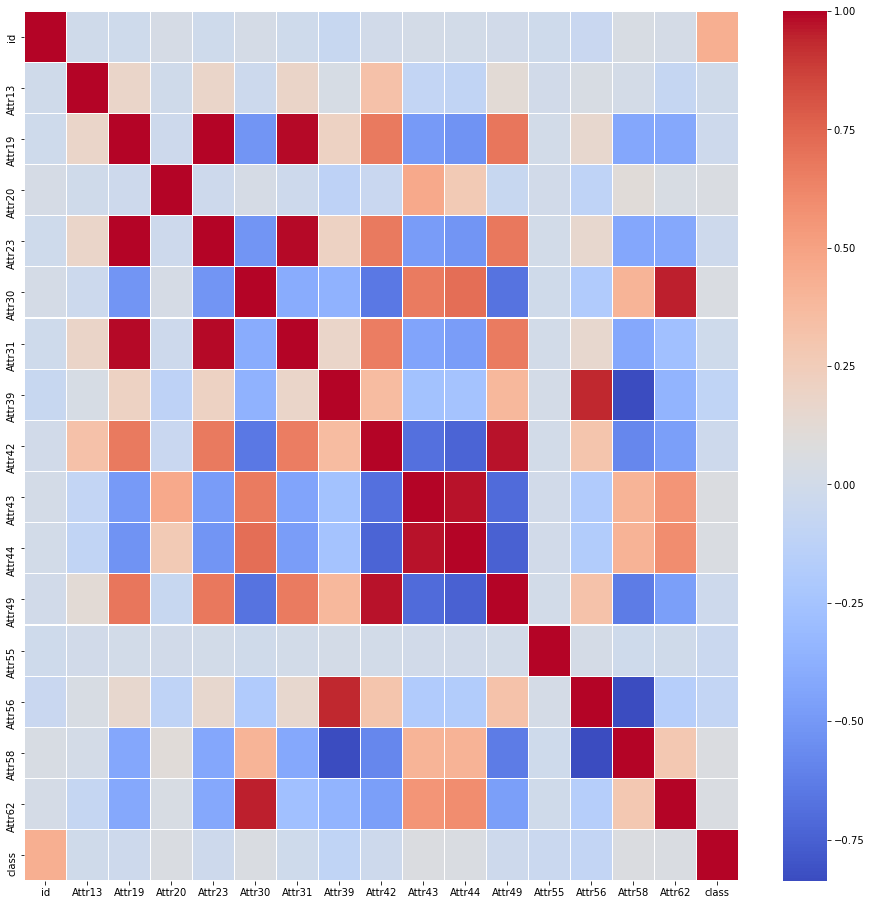

In [34]:
#plot correlation using seaborn

import seaborn as sns

f,ax = plt.subplots(figsize=(16,16))
sns.heatmap(cor_bankruptcy_v1,ax=ax, linewidths=0.1, cmap='coolwarm')

In [35]:
##dropping duplicate columns 

bankruptcy_data_v1.drop_duplicates(keep=False,inplace=True)

In [36]:
#deletinf attr37, beacuse it has lot of missing values

del bankruptcy_data_v1['Attr37']

In [37]:
#filling missing value with mean

bankruptcy_data_v1.fillna(bankruptcy_data_v1.mean(),inplace=True)



In [38]:
#high corealtaion hence, removing 

bankruptcy_data_v1=bankruptcy_data_v1.drop(['Attr8','Attr11','Attr16','Attr22','Attr23','Attr26','Attr31','Attr33','Attr34','Attr35','Attr38','Attr4','Attr40','Attr44','Attr46','Attr48','Attr49','Attr50','Attr54','Attr56','Attr60','Attr62','Attr63','Attr64','Attr7'],axis=1)

<H1> Smoteen + Random Forst Classifier

In [39]:
!pip install imblearn

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [41]:
#list of feature labels 

feature_labels =['Attr1','Attr2','Attr3','Attr5','Attr6','Attr9','Attr10','Attr12','Attr13','Attr14','Attr15','Attr17','Attr19','Attr20','Attr21','Attr24','Attr25','Attr27','Attr28','Attr29','Attr30','Attr32','Attr36','Attr39','Attr41','Attr42','Attr43','Attr45','Attr47','Attr51','Attr52','Attr53','Attr55','Attr57','Attr58','Attr59','Attr61']

In [42]:
#creating X and y from feature
X= bankruptcy_data_v1[feature_labels].values
y=bankruptcy_data_v1['class'].values.ravel()

#create randomforest classifier

rf_clf_model= RandomForestClassifier(n_estimators=10000, random_state=0,n_jobs=-1)
#train RF classfier
rf_clf_model.fit(X,y)
for feature in zip(feature_labels, rf_clf_model.feature_importances_):
    print(feature)



('Attr1', 0.026971009006588553)
('Attr2', 0.01552558070237043)
('Attr3', 0.024293265338254072)
('Attr5', 0.017649021874687053)
('Attr6', 0.02253735845563671)
('Attr9', 0.024282832627014122)
('Attr10', 0.017907450688152127)
('Attr12', 0.020560497746075487)
('Attr13', 0.03068694429564237)
('Attr14', 0.026635713148548228)
('Attr15', 0.025983951830380422)
('Attr17', 0.016269862100103054)
('Attr19', 0.024862151464141734)
('Attr20', 0.014399519985461535)
('Attr21', 0.09845069202830005)
('Attr24', 0.03808068786096722)
('Attr25', 0.022650200984770497)
('Attr27', 0.06926650052572567)
('Attr28', 0.022136705461733255)
('Attr29', 0.02749032349005393)
('Attr30', 0.016211072070057984)
('Attr32', 0.01659281778975384)
('Attr36', 0.01800009286916481)
('Attr39', 0.05675907529718381)
('Attr41', 0.04595945870181295)
('Attr42', 0.04170907232071136)
('Attr43', 0.01842255034524178)
('Attr45', 0.019358455707682173)
('Attr47', 0.013587626206292332)
('Attr51', 0.018618269070461508)
('Attr52', 0.0155159211688687

In [43]:
#creating a selector object that will use the RF classifier to identify the features that has more importance than 0.03

sfm= SelectFromModel(rf_clf_model, threshold =0.03)

#training the selector 
sfm.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.03)

In [44]:
#print the  name of most important features

for feature_list_index in sfm.get_support(indices=True):
    print(feature_labels[feature_list_index])

Attr13
Attr21
Attr24
Attr27
Attr39
Attr41
Attr42
Attr58


In [45]:
X_imp_features=sfm.transform(X)

In [46]:
#converting X_filtered to Dataframe 

X_imp_features=pd.DataFrame(data=X_imp_features, index=np.arange(1,5911),columns=np.arange(1,9))

In [47]:
t_n=[]
f_p=[]
f_n=[]
t_p=[]
cv= StratifiedKFold(n_splits=5)
for train_idx, test_idx, in cv.split(X_imp_features, y):
    X_train,y_train=X[train_idx],y[train_idx]
    X_test,y_test=X[test_idx],y[test_idx]
    X_train,y_train=SMOTEENN().fit_resample(X_train,y_train)
    clf_model= RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
    clf_model.fit(X_train,y_train)
    y_rf_pred=clf_model.predict(X_test)
    accuracy_score(y_test,y_rf_pred)
    tn,fp,fn,tp=confusion_matrix(y_test,y_rf_pred).ravel()
    t_n.append(tn)
    f_p.append(fp)
    f_n.append(fn)
    t_p.append(tp)
    print("true Negative:", tn)
    print("true Positive:", tp)
    print("False Positive:", fp)
    print("false nagative:", fn)


true Negative: 1007
true Positive: 49
False Positive: 93
false nagative: 33
true Negative: 1011
true Positive: 61
False Positive: 89
false nagative: 21
true Negative: 968
true Positive: 59
False Positive: 132
false nagative: 23
true Negative: 987
true Positive: 51
False Positive: 113
false nagative: 31
true Negative: 1004
true Positive: 56
False Positive: 96
false nagative: 26


In [48]:
Avg_tn=round(sum(t_n)/len(t_n))
Avg_fp=round(sum(f_p)/len(f_p))
Avg_fn=round(sum(f_n)/len(f_n))
Avg_tp=round(sum(t_p)/len(t_p))

In [49]:
import math

#acuuracy
Accuracy_rf=(Avg_tp+Avg_tn)/(Avg_tp+Avg_tn+Avg_fp+Avg_fn)
print("Acuracy for Random forest Classifier : {:0.2f}".format(Accuracy_rf))

#Specificity
Specificity_rf=(Avg_tn)/(Avg_tn+Avg_fp)
print("Specificity for Random forest Classifier :{:0.2f} ".format(Specificity_rf))

#Recall
Recall_rf=(Avg_tp)/(Avg_tp++Avg_fn)
print("Recall for Random forest Classifier :{:0.2f} ".format(Recall_rf))

#Precision
Precision_rf=(Avg_tp)/(Avg_tp+Avg_fp)
print("Precision for Random forest Classifier : {:0.2f}".format(Precision_rf))

#GeometricMean
Gmean_rf= math.sqrt(Specificity_rf*Recall_rf)
print("Geometric Mean for Random forest Classifier :{:0.2f} ".format(Gmean_rf))


Acuracy for Random forest Classifier : 0.89
Specificity for Random forest Classifier :0.90 
Recall for Random forest Classifier :0.67 
Precision for Random forest Classifier : 0.34
Geometric Mean for Random forest Classifier :0.78 
